In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Set the image size and batch size
image_size = 224
batch_size = 32

# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Add custom top layers to the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(9, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Set up data generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/sample_train_dataset/sample_train_dataset',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/sample_test_dataset/sample_test_dataset',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 10800 images belonging to 9 classes.
Found 2700 images belonging to 9 classes.


In [ ]:
# Set up callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/models/best_model_N.h5', monitor='val_loss', save_best_only=True)

In [ ]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[early_stopping, checkpointer])

Epoch 1/30
  5/337 [..............................] - ETA: 1:56:15 - loss: 2.2711 - accuracy: 0.1250

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss') #Plotting the accuracies
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 10s 10s/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
Circle


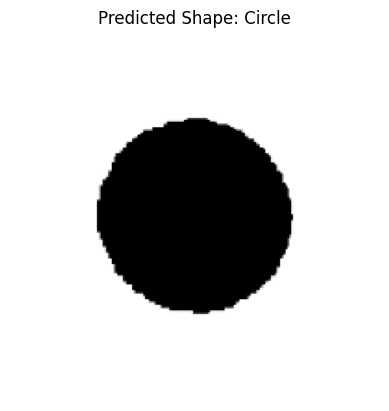

In [4]:
# Make predictions on a test image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import keras
# Load the best saved model
saved_model = keras.models.load_model("/content/drive/MyDrive/models/best_model_1.h5")



# test_image_path = "/content/WhatsApp Image 2023-07-12 at 21.10.15.jpg"  # Path to your test image
# test_image_path = "/content/drive/MyDrive/Heptagon.png"  # Path to your test image
# test_image_path = "/content/drive/MyDrive/Hexagon.png"  # Path to your test image
# test_image_path = "/content/drive/MyDrive/Nonagon.png"  # Path to your test image--
# test_image_path = "/content/drive/MyDrive/Octagon.png"  # Path to your test image
# test_image_path = "/content/drive/MyDrive/Pentagon.png"  # Path to your test image--
# test_image_path = "/content/drive/MyDrive/Star.png"  # Path to your test image
# test_image_path = "/content/drive/MyDrive/Triangle.jpg"  # Path to your test image--
# test_image_path = "/content/drive/MyDrive/square.png"  # Path to your test image--


# test_image_path = "/content/drive/MyDrive/square-.png"  # Path to your test image--
# test_image_path = "/content/drive/MyDrive/star-.png"  # Path to your test image--
test_image_path = "/content/drive/MyDrive/circle-.png"  # Path to your test image--
# test_image_path = "/content/drive/MyDrive/triangle-.png"  # Path to your test image--

test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Map the predicted class indices to shape labels
shape_labels = ["Circle", "Heptagon", "Hexagon", "Nonagon", "Octagon", "Pentagon", "Square", "Star" ,"Triangle"]
output = saved_model.predict(test_image)
print(output)
predicted_shape_index = np.argmax(output)
print(predicted_shape_index)
predicted_shape_label = shape_labels[predicted_shape_index]
print(predicted_shape_label)
plt.imshow(image.load_img(test_image_path))
plt.title(f"Predicted Shape: {predicted_shape_label}")
plt.axis('off')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# model_1=load_model('/content/gdrive/MyDrive/vgg16.hdf5')
saved_model = keras.models.load_model("/content/drive/MyDrive/models/best_model_1.h5")